#  Q-Learning

In a [previous notebook](./cem.ipynb), we tackled the problem of learning an approximation to the $Q$-function via the [Cross-Entropy Method](https://link.springer.com/book/10.1007/978-1-4757-4321-0). In its most basic form, table $Q$-learning can only be applied for problems defined on small state spaces. However, when combined with deep learning it evolves into [Deep Q-learning](), which can also be applied to high-dimensional state spaces such as pixel images in [Space Invaders](https://gym.openai.com/envs/SpaceInvaders-v0/).

In the present notebook, we consider **Q-Learning** as an alternative. The code is based on the highly recommendable [tutorial by Arthur Juliani]().

## Learning the Q-table

Tabular Q-learning is based on the **Bellman Equation** for the state-value function $Q^*$ under the optimal policy:
$$Q^*(s, a) = r + \gamma\max_{a' \in A} Q^*(s', a'),$$
where $\gamma < 1$ is the discount factor and $s'$ is the state of the environment after performing the action $a$ in state $s$. In tabular $Q$-learning, we first collect tuples $(s, a, s', r)$ by having an agent interact with the environment. Then, we push the $Q$-values carefully in the direction of the values indicated by the Bellman Equation. That is, we set
$$Q(s, a) \leftarrow Q(s,a) + \alpha \delta,$$
where $\alpha > 0$ is a **learning rate** and 
$$\delta = (r + \gamma \max_{a' \in A} Q(s', a')) - Q(s, a)$$ 
is the **TD error**.

In [5]:
lr = 0.8
gamma = .95

def q_step(Q, env, sigma, s):
    """Update the q-values once
    
    # Arguments
        Q: Q function
        env: environment for the problem
        sigma: strength of noise for fuzzy action selection
        s: current state
    # Result
        Q, s, r, d after the step in the environment
    """
    
    a = np.argmax(Q[s, :] + np.random.randn(1, env.nA) * sigma)
    
    ss, r, d, _ = env.step(a)
    
    delta = r + gamma * np.max(Q[ss,:]) - Q[s,a]
    Q[s, a] = Q[s, a] + lr * delta
    
    return Q, ss, r, d

This approach learns the optimal policy rapidly in small state spaces. However, in larger state spaces it is no longer effective since an enormous number of runs would is necessary to update the $Q$-values of every state-action pair for a reasonably large number of iterations.

## Example: Frozen Lake

As an example, we return to the game ``Frozen Lake`` that we have considered already when learning about [value iteration](./valIt.ipynb).


In [8]:
neps = int(1e3)
nsteps = int(1e2)
rList = []
Q = np.zeros((env.nS, env.nA))

for i in range(neps):
    s = env.reset()
    rTot = 0
    for _ in range(nsteps):
        Q, s, r, d = q_step(Q, env, 1 / (i + 1), s)
        rTot +=r
        if(d):
            break
    rList.append(rTot)

Plotting the moving averages illustrates that we quickly learn a good policy.

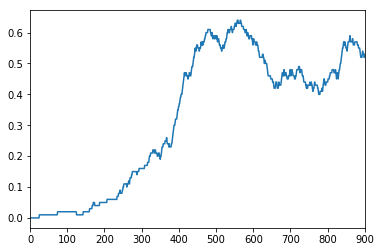

In [15]:
import seaborn as sns
%matplotlib inline
window = int(1e2)

mov_avg = np.convolve(rList, np.ones(window) / window,   'valid')
sns.tsplot(mov_avg)